<table width="100%" style="padding:0; margin-left:-6px;">
    <tr style="padding=0;" width="100%">
        <td width="auto">
           <hr style="border:2px solid darkblue">
            <h1> nb7. Query by sensitivity</h1>
           <hr style="border:2px solid darkblue">
        </td>
        <td width="60px">
           <img src="ALMAsmall.png" align="right"/> 
        </td>
    </tr>
</table>  

In this notebook we query the observations of higher sensitivity at a given resolution.

The relevant columns in the ALMA Archive datasets are 
* *sensitivity_10kms* 
* *cont_sensitivity_bandwidth*. 


Import all necessary modules:

In [1]:
from astropy.table import Table
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pyvo
import matplotlib.pyplot as plt

service = pyvo.dal.TAPService("https://almascience.eso.org/tap")      # for the EU ALMA TAP service

# service = pyvo.dal.TAPService("https://almascience.nao.ac.jp/tap")  # for the EA ALMA TAP service
# service = pyvo.dal.TAPService("https://almascience.nrao.edu/tap")   # for the NA ALMA TAP service

<hr style="border:2px solid darkblue"> </hr>


## Query spectra by sensitivity 
<hr style="border:2px solid darkblue"> </hr>




This function queries the (spectroscopic) observations with a given science keyword, which have ALMA observations at sensitivities smaller than the given value.

In [2]:
def query_line_sensitivity(service, science_keyword, sensitivity_10kms_max):
    """Queries the science observations with the given keyword for sensitivities smaller than the given sensitivity
    
       service                     pyvo TAPService instance
       science_keyword             one of the science keywords (see Notebook 4, Example 4a or the ALMA Science Archive query interface)
       sensitivity_10kms_max       maximum sensitivity in a 10km/s bandwidth bin in mJy/beam (see Notebook 0 for all columns and units)
              
       returns                     pandas table    
    """

    query = f"""  
            SELECT * 
            FROM ivoa.obscore  
            WHERE science_keyword like '%{science_keyword}%'  
            AND science_observation = 'T'  
            AND sensitivity_10kms < {sensitivity_10kms_max}  
            """

    return service.search(query).to_table().to_pandas()

<hr style="border:2px solid darkblue"> </hr>


## Query  by continuum sensitivity
<hr style="border:2px solid darkblue"> </hr>





This function queries the (continuum) observations with a given science keyword, which have ALMA observations at sensitivities smaller than the given value.

In [3]:
def query_continuum_sensitivity(service, science_keyword, continuum_sensitivity_max):
    """Queries the observations of a given scientific keyword for their aggregate continuum sensitivity
    
       service                     pyvo TAPService instance
       science_keyword             one of the science keywords (see Notebook 4, Example 4a or the ALMA Science Archive query interface)
       continuum_sensitivity_max   maximum sensitivity in the aggregate bandwidth in mJy/beam (see Notebook 0 for all columns and units)
              
       returns                     pandas table    
    """

    query = f"""  
            SELECT *  
            FROM ivoa.obscore  
            WHERE science_keyword like '%{science_keyword}%'  
            AND science_observation = 'T'   
            AND cont_sensitivity_bandwidth < {continuum_sensitivity_max}   
            """

    return service.search(query).to_table().to_pandas()

---------------

## Example 7a.  Where are the most sensitive 'starburst galaxies' (science keyword) continuum observations?

In [4]:
output = query_continuum_sensitivity(service, 'Starburst galaxies', 0.1)

<AxesSubplot:xlabel='s_ra', ylabel='s_dec'>

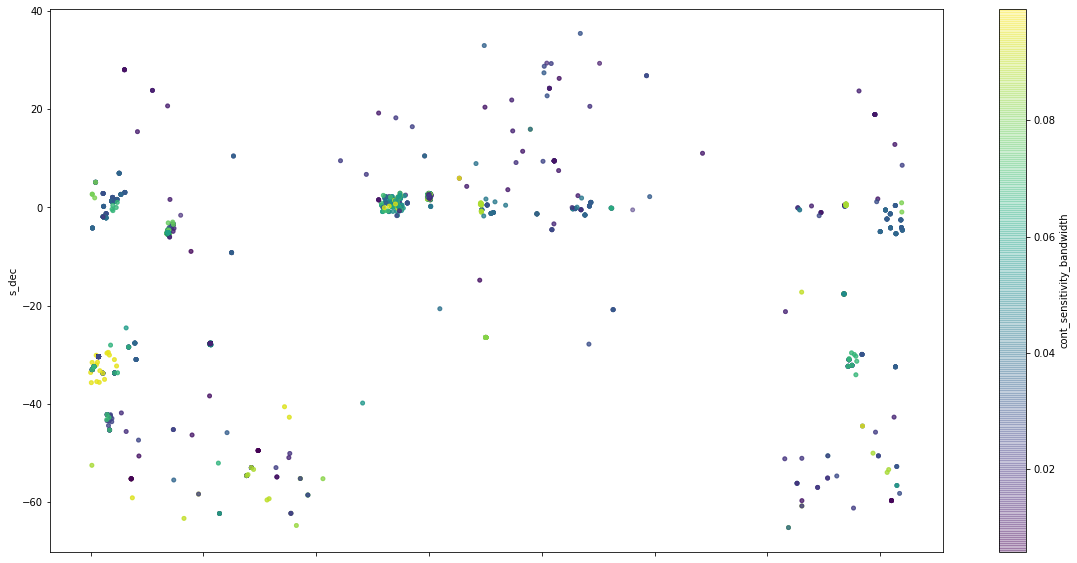

In [5]:
plt.rcParams["figure.figsize"] = (20,10)

output.plot(kind='scatter', x='s_ra', y='s_dec', c='cont_sensitivity_bandwidth', s=15, alpha=0.3, colormap='viridis')